In [1]:
import numpy as np
import os
import cv2
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
import scipy.misc
from PIL import Image

# Model input shape

In [124]:
def npy_to_rgb_image(n):
    cv2_rgb = np.uint8(np.transpose(n, (1, 2, 0)) * 255.0)
    cv2_bgr = cv2.cvtColor(cv2_rgb, cv2.COLOR_BGR2RGB)
    plt.imshow(cv2_rgb)
    
def npy_to_depth_image(n):
    np_depth = np.uint16(ref_nyu_depth[0] * 1000)
    plt.imshow(np_depth)
    
ref_nyu_rgb = np.load("")
ref_nyu_depth = np.load("")
ref_sun_rgb = np.load("")
ref_sun_depth = np.load("")

print(ref_nyu_rgb.shape, ref_nyu_rgb.dtype)
print(ref_nyu_depth.shape, ref_nyu_depth.dtype)
print(ref_sun_rgb.shape, ref_sun_rgb.dtype)
print(ref_sun_depth.shape, ref_sun_depth.dtype)

# rgb : (3, 240, 320)
# depth: (1, 240, 320)

(3, 240, 320) float32
(1, 240, 320) float32
(3, 240, 320) float32
(3, 240, 320) float32


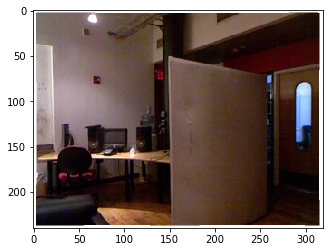

In [144]:
npy_to_rgb_image(ref_nyu_rgb)

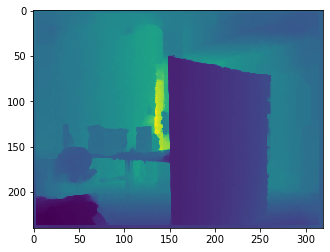

In [145]:
npy_to_depth_image(ref_nyu_depth)

---

# My Dataset Preprocessing

## Resize/Reshape npy (320, 240)

In [129]:
def reshape_npy_rgb(filepath):
    n = np.load(filepath)
    img = Image.fromarray(n)
    img = img.resize(size=(320, 240))
    resized_n = np.array(img, dtype='float32')
    reshaped_n = np.transpose(resized_n, (2, 0, 1)) / 255.0
    return reshaped_n

In [130]:
def reshape_npy_depth(filepath):
    n = np.load(filepath)
    img = Image.fromarray(n)
    img = img.resize(size=(320, 240))
    resized_n = np.array(img, dtype='float32')
    reshaped_n = b.reshape(1, 240, 320) / 10000.0
    return reshaped_n

In [65]:
my_data = ""
a = resize_npy(my_data)

In [131]:
PATH = ""
OUTPATH = ''

for filename in os.listdir(PATH):
    if filename.endswith('RGB.npy'):
        print(filename)
        img = reshape_npy_rgb(PATH + "/" + filename)
        n = np.array(img, dtype='float32')
        np.save(OUTPATH + "/" + filename, n)
    elif filename.endswith('DEPTH.npy'):
        print(filename)
        img = reshape_npy_depth(PATH + "/" + filename)
        n = np.array(img, dtype='float32')
        np.save(OUTPATH + "/" + filename, n)

200608-153017-386665_DEPTH.npy
200608-153017-386665_RGB.npy
200608-153021-333835_DEPTH.npy
200608-153021-333835_RGB.npy
200608-153035-719767_DEPTH.npy
200608-153035-719767_RGB.npy
200608-153043-810561_DEPTH.npy
200608-153043-810561_RGB.npy
200608-153113-434993_DEPTH.npy
200608-153113-434993_RGB.npy
200608-153113-969345_DEPTH.npy
200608-153113-969345_RGB.npy
200608-153125-496224_DEPTH.npy
200608-153125-496224_RGB.npy


## image -> npy

In [5]:
def image_to_npy(image_path, image_name, debug=False):
    img = Image.open(image_path + "/" + image_name)
    data = np.array(img, dtype='float32') # uint8
    
    if debug:
        save_path = image_name.split('.')[0] + ".npy"
        np.save(save_path, data)
        test_img = np.load(save_path)
        plt.imshow(test_img)
    return data

In [ ]:
image_to_npy(image_path='',
            image_name='',
            debug=True)

# Inference Result Visualization

In [ ]:
def show_np_to_image(n):
    plt.imshow(n)
    plt.show()
    
def save_np_to_image(path, n):
    mpimg.imsave(path, n)

In [ ]:
PATH=""

for filename in os.listdir(PATH):
    filepath = PATH + "/" + filename
    n = np.load(filepath)

#     show_np_to_image(n)
    save_np_to_image(PATH + "/" + filename.split('.')[0] + ".png", n)